In [122]:
import pandas as pd
import numpy as np

df = pd.read_excel('timvarden-2021-01-11.xls', skiprows=4, converters= {'2021': pd.to_datetime})

#df.keys()

In [123]:
#sol
df['SolkraftproduktionTotMWh'] = df['SolkraftproduktionSE4MWh'] + df['SolkraftproduktionSE3MWh'] + \
    df['SolkraftproduktionSE2MWh'] + df['SolkraftproduktionSE1MWh']

#vind
df['VindkraftproduktionTotMWh'] = df['VindkraftproduktionSE1MWh'] + df['VindkraftproduktionSE2MWh'] + \
    df['VindkraftproduktionSE3MWh'] + df['VindkraftproduktionSE4MWh']

#vatten
df['Vattenkraft produktionTotMWh'] = df['Vattenkraft produktionSE1MWh'] + df['Vattenkraft produktionSE2MWh'] + \
    df['Vattenkraft produktionSE3MWh'] + df['Vattenkraft produktionSE4MWh']

#värme
df['VärmekraftproduktionTotMWh'] = df['VärmekraftproduktionSE1MWh'] + df['VärmekraftproduktionSE2MWh'] + \
    df['VärmekraftproduktionSE3MWh'] + df['VärmekraftproduktionSE4MWh']

#kärn
df['KärnkraftproduktionTotMWh'] = df['KärnkraftproduktionSE3MWh']

#ospec
df['OspecproduktionTotMWh'] = df['Ospec. produktionSE1MWh'] + df['Ospec. produktionSE2MWh'] + \
    df['Ospec. produktionSE3MWh'] + df['Ospec. produktionSE4MWh']



In [124]:
#fix time

df['time'] = df['2021']
df['angles'] = np.linspace(0, np.pi*2, len(df['2021']))
df['xticks'] = np.linspace(1, 12, len(df['2021']))
df.head()

,2021,Timmätt förbrexkl. avk.lastSE1MWh,Timmätt förbrexkl. avk.lastSE2MWh,Timmätt förbrexkl. avk.lastSE3MWh,Timmätt förbrexkl. avk.lastSE4MWh,Timmätt förbr>50 MWSE1MWh,Timmätt förbr>50 MWSE2MWh,Timmätt förbr>50 MWSE3MWh,Timmätt förbr>50 MWSE4MWh,Avkopplingsb.lastSE1MWh,...,SchablonleveransförlusterSE4MWh,SolkraftproduktionTotMWh,VindkraftproduktionTotMWh,Vattenkraft produktionTotMWh,VärmekraftproduktionTotMWh,KärnkraftproduktionTotMWh,OspecproduktionTotMWh,time,angles,xticks
0,2021-01-01 00:00:00,-617.308343,-522.589174,-4232.448868,-1060.265758,-167.986568,-548.179199,-588.475962,-3.373800,-1.040080,...,-103.279074,0.124571,1208.869653,10697.544684,1105.686050,6726.50,29.912795,2021-01-01 00:00:00,0.000000,1.000000
1,2021-01-01 01:00:00,-627.778187,-497.182573,-4222.276545,-1052.641770,-167.266918,-558.712601,-587.852744,-3.452400,-1.017013,...,-99.415237,0.133327,817.106194,10474.112317,1071.201318,6729.10,30.036172,2021-01-01 01:00:00,0.000784,1.001372
2,2021-01-01 02:00:00,-630.691519,-490.763213,-4227.138128,-1044.005800,-170.222800,-560.020600,-570.800748,-3.396000,-1.077333,...,-95.965131,0.125923,753.215642,10410.790334,1055.977769,6728.16,30.265464,2021-01-01 02:00:00,0.001568,1.002745
3,2021-01-01 03:00:00,-627.771419,-500.155991,-4211.540578,-1045.569056,-168.621640,-560.984199,-562.362661,-3.378600,-1.058449,...,-93.556855,0.135106,712.672708,10386.806954,1053.614573,6728.36,30.681982,2021-01-01 03:00:00,0.002352,1.004117
4,2021-01-01 04:00:00,-631.240238,-509.870820,-4247.722087,-1055.394647,-170.829070,-557.875401,-560.135292,-3.427199,-1.696037,...,-92.608099,0.143198,658.660693,10348.524926,1063.099292,6728.19,30.302306,2021-01-01 04:00:00,0.003136,1.005490


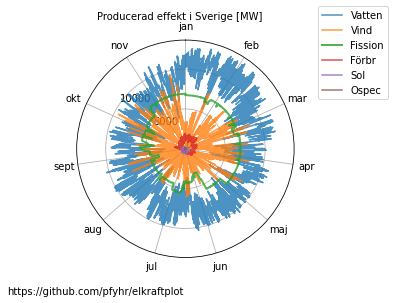

In [125]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

plt.plot(df['angles'], df['Vattenkraft produktionTotMWh'], label='Vatten', alpha=0.8)
plt.plot(df['angles'], df['VindkraftproduktionTotMWh'], label='Vind', alpha=0.8)
plt.plot(df['angles'], df['KärnkraftproduktionTotMWh'], label='Fission', alpha=0.8, linewidth=2)
plt.plot(df['angles'], df['VärmekraftproduktionTotMWh'], label='Förbr', alpha=0.8)
plt.plot(df['angles'], df['SolkraftproduktionTotMWh'], label='Sol', alpha=0.8)
plt.plot(df['angles'], df['OspecproduktionTotMWh'], label='Ospec', alpha=0.8)

#radialtick
ax.set_rticks([0, 5000, 10000])
ax.set_rlabel_position(-55)  # Move radial labels away from plotted line

#thetatick
#ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/2.0))
#ax.set_xticklabels(['jan', 'apr', 'jul','okt'])

#thetatick varje månad
ax.set_xticks(np.arange(0,2.0*np.pi,2*np.pi/11.))
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sept', 'okt', 'nov'])

angle = np.deg2rad(12)
ax.legend(loc="lower left",
          bbox_to_anchor=(.6 + np.cos(angle)/2, .6 + np.sin(angle)/2))

#titel och annot
fig.suptitle('Producerad effekt i Sverige [MW]', fontsize=10)

plt.text(0.1, -0.001, 'https://github.com/pfyhr/elkraftplot', fontsize=10, transform=plt.gcf().transFigure)

plt.savefig("kraftsystem_pol.png", dpi=600, bbox_inches='tight')
plt.show()

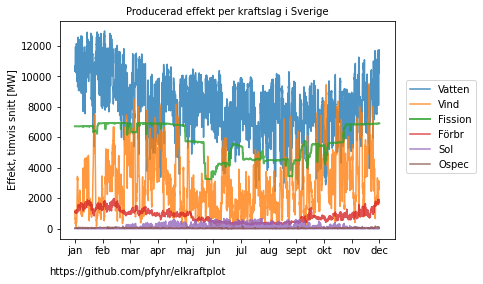

In [126]:
#vanlig plot

fig, ax = plt.subplots()


plt.plot(df['xticks'], df['Vattenkraft produktionTotMWh'], label='Vatten', alpha=0.8)
plt.plot(df['xticks'], df['VindkraftproduktionTotMWh'], label='Vind', alpha=0.8)
plt.plot(df['xticks'], df['KärnkraftproduktionTotMWh'], label='Fission', alpha=0.8, linewidth=2)
plt.plot(df['xticks'], df['VärmekraftproduktionTotMWh'], label='Förbr', alpha=0.8)
plt.plot(df['xticks'], df['SolkraftproduktionTotMWh'], label='Sol', alpha=0.8)
plt.plot(df['xticks'], df['OspecproduktionTotMWh'], label='Ospec', alpha=0.8)

ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sept', 'okt', 'nov', 'dec'])
plt.title('Producerad effekt per kraftslag i Sverige', fontsize=10)
ax.legend(bbox_to_anchor=(1.02, 0.75))
ax.set_ylabel('Effekt, timvis snitt [MW]')

plt.text(0.1, -0.001, 'https://github.com/pfyhr/elkraftplot', fontsize=10, transform=plt.gcf().transFigure)



plt.savefig("kraftsystem_norm.png", dpi=600, bbox_inches='tight')
plt.show()

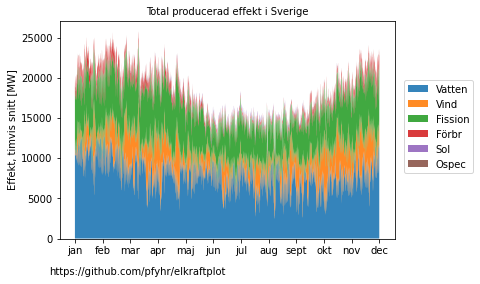

In [127]:
fig, ax = plt.subplots()

labels = ['Vatten', 'Vind', 'Fission', 'Förbr', 'Sol', 'Ospec']
plt.stackplot(df['xticks'], df['Vattenkraft produktionTotMWh'], \
                df['VindkraftproduktionTotMWh'], df['KärnkraftproduktionTotMWh'], \
                df['VärmekraftproduktionTotMWh'], df['SolkraftproduktionTotMWh'], \
                df['OspecproduktionTotMWh'], labels=labels, alpha=0.9)

ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sept', 'okt', 'nov', 'dec'])
plt.title('Total producerad effekt i Sverige', fontsize=10)
ax.legend(bbox_to_anchor=(1.25, 0.75))
ax.set_ylabel('Effekt, timvis snitt [MW]')

plt.text(0.1, -0.001, 'https://github.com/pfyhr/elkraftplot', fontsize=10, transform=plt.gcf().transFigure)

plt.savefig("kraftsystem_stack.png", dpi=600, bbox_inches='tight')
plt.show()